In [16]:
# import pandas as pd

# celeb_data = pd.read_csv('list_attr_celeba.csv')

# celeb_data.replace(-1, 0, inplace=True)
# celeb_data.drop(columns = ['image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 'Wearing_Necktie'], inplace=True)

# celeb_data.head()

Feature importances: [0.00335417 0.01878899 0.05617651 0.01539743 0.01030178 0.01555433
 0.03521624 0.01643278 0.0290743  0.0061681  0.01245795 0.26838004
 0.0244905  0.12588651 0.00552553 0.01656296 0.00947133 0.03560986
 0.01314714 0.03534176 0.02026328 0.00821659 0.00654117 0.02082633
 0.02592876 0.16488566]
Selected features:
Index(['Big_Nose', 'Heavy_Makeup', 'Male', 'Young'], dtype='object')

Transformed dataset (X_new):
        Big_Nose  Heavy_Makeup  Male  Young
0              0             1     0      1
1              1             0     0      1
2              0             0     1      1
3              0             0     0      1
4              0             1     0      1
...          ...           ...   ...    ...
202594         0             0     0      1
202595         0             0     1      1
202596         0             0     1      1
202597         0             1     0      1
202598         0             1     0      1

[202599 rows x 4 columns]
Male
0    0.67

/opt/anaconda3/envs/csen140/lib/python3.12/site-packages/sklearn/base.py:486: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  warnings.warn(


Attractive           1.000000
Bald                -0.145826
Big_Lips             0.062552
Big_Nose            -0.277064
Black_Hair           0.004140
Blond_Hair           0.154774
Brown_Hair           0.132069
Chubby              -0.236877
Double_Chin         -0.208981
Eyeglasses          -0.222701
Goatee              -0.146613
Gray_Hair           -0.201796
Heavy_Makeup         0.477084
High_Cheekbones      0.149095
Male                -0.394451
Mustache            -0.140182
Narrow_Eyes         -0.073882
No_Beard             0.197655
Oval_Face            0.193939
Pale_Skin            0.086051
Pointy_Nose          0.228292
Receding_Hairline   -0.178677
Rosy_Cheeks          0.163867
Sideburns           -0.100229
Straight_Hair        0.041550
Wavy_Hair            0.214992
Young                0.387735
Name: Attractive, dtype: float64


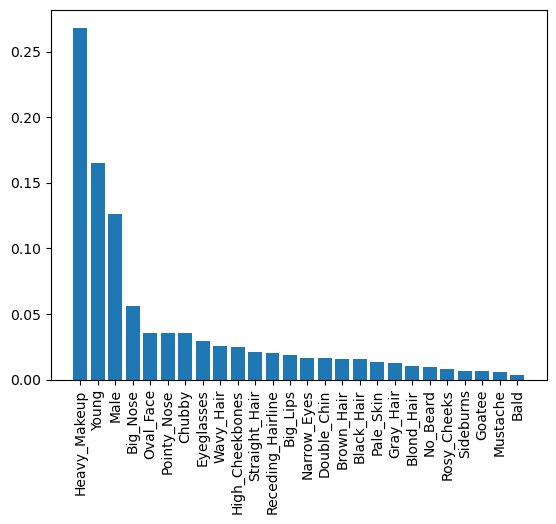

<BarContainer object of 26 artists>

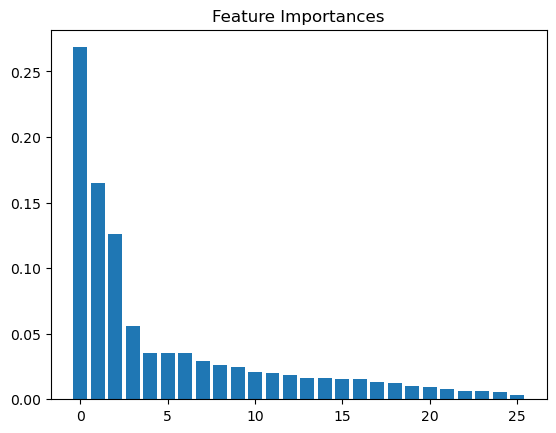

In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

# Load the dataset
celeb_data = pd.read_csv('list_attr_celeba.csv')

# Replace -1 with 0
celeb_data.replace(-1, 0, inplace=True)

# Drop unnecessary columns
celeb_data.drop(columns=[
    'image_id', '5_o_Clock_Shadow', 'Arched_Eyebrows', 'Bags_Under_Eyes', 
    'Bushy_Eyebrows', 'Bangs', 'Blurry', 'Smiling', 'Mouth_Slightly_Open', 
    'Wearing_Earrings', 'Wearing_Hat', 'Wearing_Lipstick', 'Wearing_Necklace', 
    'Wearing_Necktie'
], inplace=True)

# Define features (X) and target (y)
X = celeb_data.drop("Attractive", axis=1)  # Keep column names
y = celeb_data["Attractive"].values

# Initialize and fit the ExtraTreesClassifier
clf = ExtraTreesClassifier(n_estimators=50, random_state=42)
clf = clf.fit(X, y)

# Feature importance
importances = clf.feature_importances_
print("Feature importances:", importances)

# Select important features
model = SelectFromModel(clf, prefit=True)
X_new = model.transform(X)

# Map the selected features
selected_features = X.columns[model.get_support()]
X_new_df = pd.DataFrame(X_new, columns=selected_features)

# Print the transformed dataset and its features
print("Selected features:")
print(selected_features)

print("\nTransformed dataset (X_new):")
print(X_new_df)

# average attractiveness differs for males (Male=1) vs. females (Male=0)
print(celeb_data.groupby("Male")["Attractive"].mean())

# correlations between each attribute and Attractive.
print(celeb_data.corr()["Attractive"])
# positive correlation: more attractiveness with attribute
# negative correlation: less attraciveness with attribute
# numbers closer to 0 

# visualize feature importances
feature_names = X.columns
importances = clf.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure()
plt.title("Feature Importances")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.show()

In [18]:
# import seaborn as sns

# corr = celeb_data.corr()
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
# plt.title("Correlation Heatmap")
# plt.show()